# Task 1: Data Preparation

You will start by loading the CSV data from the file (using appropriate pandas functions) and checking whether the loaded data is equivalent to the data in the source CSV file.

Then, you need to clean the data by using the knowledge we taught in the lectures. You need to deal with all the potential issues/errors in the data appropriately.

###### (Please note that this is just a sample template, and please feel free to add more cells to complete of the sub-tasks in the assignment. The following existing cells are for example purposes only.)

In [1]:
#s-3482450 Matthew Bird Assignment 1 - Practical Data Science With Python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
NBA_players_stats_p = 'NBA_players_stats.csv'
NBA_players_stats = pd.read_csv(NBA_players_stats_p, sep=',', decimal='.')
NBA_players_stats.dtypes
#we can see that only our Player, Position and team are type object(a string). the rest are correctly an integer or a float.

Rk          int64
Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP          int64
FG          int64
FGA         int64
FG%       float64
3P          int64
3PA         int64
3P%       float64
2P          int64
2PA         int64
2P%       float64
FT          int64
FTA         int64
FT%       float64
ORB         int64
DRB         int64
TRB         int64
AST         int64
STL         int64
BLK         int64
TOV         int64
PF          int64
PTS         int64
dtype: object

In [3]:
# Clean the data
temp_NBA= NBA_players_stats
#temp_NBA['Pos'].unique() - shows that we have case sensitive errors and blank spaces in our strings 
#first we will remove these
temp_NBA['Pos'] = temp_NBA['Pos'].str.upper().str.strip()
#Finally we will remove typos
temp_NBA.loc[temp_NBA.Pos == 'PFA', 'Pos'] = "PF"
temp_NBA.loc[temp_NBA.Pos == 'SGA', 'Pos'] = "SG"
temp_NBA.loc[temp_NBA.Pos == 'SF.', 'Pos'] = "SF"
#temp_NBA['Age'].unique()- shows two unusual values '-19' and '280'. Both are impossible values- but safe to assume 19 
#28 are the intended entries as these are well within an expected age of an NBA player. 
temp_NBA['Age'] = temp_NBA['Age'].abs()
temp_NBA.loc[temp_NBA.Age == 280, 'Age'] = 28
#again with team we ca nsee there is white space and case sensitive errors we can fix using a similar approach to 'Pos'
temp_NBA['Tm'] = temp_NBA['Tm'].str.upper().str.strip()
temp_NBA.loc[temp_NBA.Tm == 'H0U', 'Tm'] = "HOU"
#for PTS above 2000, we can see the two unique values 20000, and 28800 are way too high, but 200 and 288 are acceptable entries
#and would likely be the intended entry, and would be a less detramental effect on the data than replacing with NAN or 0. 
for i in range(len(temp_NBA)) :
    x= temp_NBA.loc[i, "PTS"]
    if x >= 2000:
        temp_NBA.loc[temp_NBA.PTS == temp_NBA.loc[i, "PTS"], 'PTS'] = int(x/100)
#Reading our data, we can see that 0 attempts and 0 scores have a NaN value replace NAN entries with 0(so they appear at bottom
# or '0' of our graphs) 
temp_NBA['3P%'] = temp_NBA['3P%'].fillna(0)
temp_NBA['2P%'] = temp_NBA['2P%'].fillna(0)
temp_NBA['FG%'] = temp_NBA['FG%'].fillna(0)







In [4]:
"""
Make sure that you write the final cleaned dataframe object into a csv file
XXXXX.to_csv('cleaned_NBA_players_stats.csv', index=False)
Please replace XXXXX with your dataframe variable.
"""
temp_NBA.to_csv('cleaned_NBA_players_stats.csv', index=False)

# Task 2: Data Exploration

## Task 2.1 
Explore the players' total points: Please analyze the composition of the total points of the top five players with the most points.

In [5]:
# Code goes after this line by adding cells
NBA_players_stats_c = 'cleaned_NBA_players_stats.csv'
NBA_clean = pd.read_csv(NBA_players_stats_c, sep=',', decimal='.')
top5= NBA_clean.sort_values(by='PTS', ascending=False).head()
                


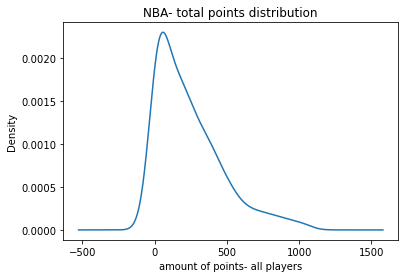

In [6]:
NBA_clean['PTS'].plot(kind='density')
plt.title('NBA- total points distribution')
plt.xlabel('amount of points- all players')
plt.show()
#first we will look at the total points distibution of all players

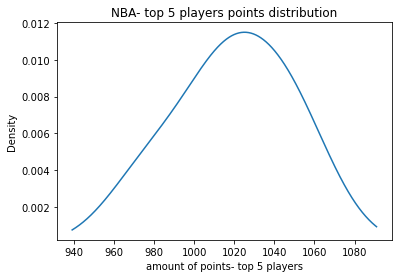

In [7]:
top5['PTS'].plot(kind='density')
plt.title('NBA- top 5 players points distribution')
plt.xlabel('amount of points- top 5 players')
plt.show()
#then we will look at the points distribution of the top 5 players
#thos shows that all top 5 players have a similar total amount of points- ranging from around roughly 940-1080

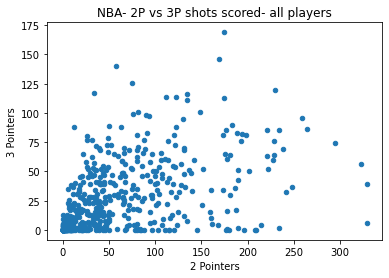

In [8]:
ax=NBA_clean.plot(kind='scatter', x='2P', y='3P')
plt.title('NBA- 2P vs 3P shots scored- all players')
plt.xlabel('2 Pointers')
plt.ylabel('3 Pointers')
plt.show()
#now we will look at the composition of all players scores of 2P or 3P shots. We can see that there is a 
#we can see that there is a wide distribution of combinations of 2P and 3P shots across players. Some players show
# a preference towards 2P or 3P shots, where as some show a balance of 2P or 3P shots

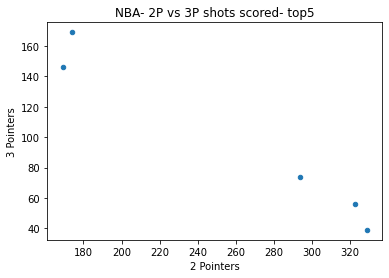

In [9]:
top5.plot(kind='scatter', x='2P', y='3P')
plt.title('NBA- 2P vs 3P shots scored- top5')
plt.xlabel('2 Pointers')
plt.ylabel('3 Pointers')
plt.show()
#when we look at the top 5 players, we can see a clear bias towards either favoring 2P or 3P shots. 
#this could be indicative that all top 5 players specialise towards either 2P or 3P shots. 

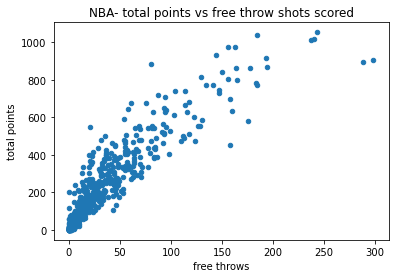

In [10]:
NBA_clean.plot(kind='scatter', x='FT', y='PTS')
plt.title('NBA- total points vs free throw shots scored')
plt.xlabel('free throws')
plt.ylabel('total points')
plt.show()
# with the free shots there is a more linear result for proportion of free throws to total points. 

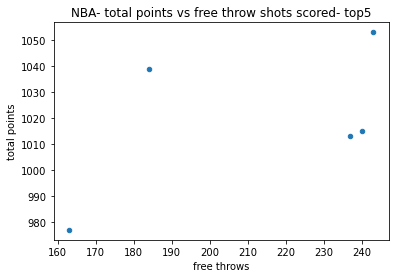

In [11]:
top5.plot(kind='scatter', x='FT', y='PTS')
plt.title('NBA- total points vs free throw shots scored- top5')
plt.xlabel('free throws')
plt.ylabel('total points')  
plt.show()


In [12]:
#we can see that the top 5 players have between 163-243 FT points. This is a lower range than the variation we had with our 
#2P and 3P shots. From these graphs we can conclude that FT does not have an affect on a player being a top player.
#But we can conclude that the best players tend to specialise towards a distinctive play style when it comes to choosing
#to make 2P or 3P shots. 

## Task 2.2 
Assuming that the data collector makes an entry error when collecting data, it can be ensured that the error occurred in the 3P, 3PA and 3P% columns, but it is not sure which player's information the error lies on. Please try to explore the error by visualization to identify how many errors there are and try to fix it.


In [13]:
#we can explore this potential error by performing the calculation ourselves for the 3P% and plotting it agianst the 
#official 3P% we can see three scattoer points that do not follow the trend. We have 3 errors. 

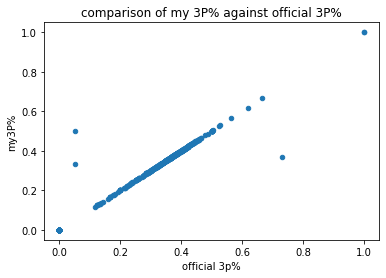

In [14]:
NBA_clean['my3P%'] = NBA_clean['3P']/NBA_clean['3PA']
NBA_clean.plot(kind='scatter', x='3P%', y='my3P%')
plt.title('comparison of my 3P% against official 3P%')
plt.xlabel('official 3p%')
plt.show()


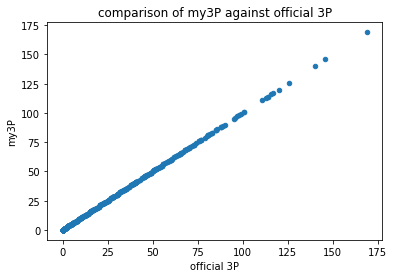

In [15]:
#we can then check that our new 3P% is correct by solving for our 3P and comparing against the old 3P. 
NBA_clean['my3P'] = NBA_clean['my3P%']*NBA_clean['3PA']
NBA_clean.plot(kind='scatter', x='3P', y='my3P')
plt.title('comparison of my3P against official 3P')
plt.xlabel('official 3P')
plt.show()
#We can now confirm that the errors are indeed incorrect and on the official 3P% column. 

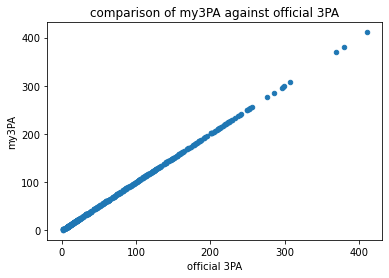

In [16]:
NBA_clean['my3PA'] = NBA_clean['my3P']/NBA_clean['my3P%']
NBA_clean.plot(kind='scatter', x='3PA', y='my3PA')
plt.title('comparison of my3PA against official 3PA')
plt.xlabel('official 3PA')
plt.show()

In [17]:
#we can replace the inccorect column with the correct column. 
NBA_clean['3P%']= NBA_clean['my3P%']
#delete our added columns
del NBA_clean['my3P%']
del NBA_clean['my3P']
#we will then override our previously cleaned data with our correct 3P%
NBA_clean.to_csv('cleaned_NBA_players_stats.csv', index=False)

## Task 2.3 
Please analyze the relationship between the player's total points and the rest features (columns). Please use at least three other columns.


In [18]:
# Code goes after this line by adding cells

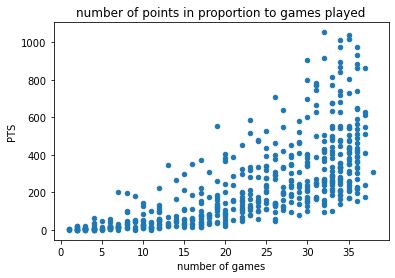

In [19]:
NBA_clean.plot(kind='scatter', x='G', y='PTS')
plt.title('number of points in proportion to games played')
plt.xlabel('number of games')
plt.show()
#we can conclude that the there isn't a relationship between number of games and points, but we can conclude
#that to be one of the top scoring players you must play in the higher brackets of total games played. 

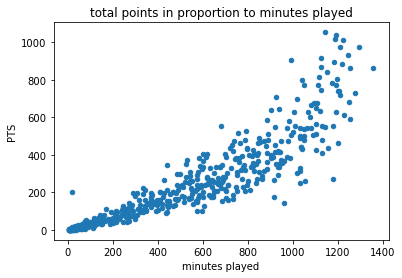

In [20]:
NBA_clean.plot(kind='scatter', x='MP', y='PTS')
plt.title('total points in proportion to minutes played')
plt.xlabel('minutes played')
plt.show()
#here we can see that there is a relationship between the number of minutes played, and the total number of points.
#here more minutes played leads to more points being scored. 

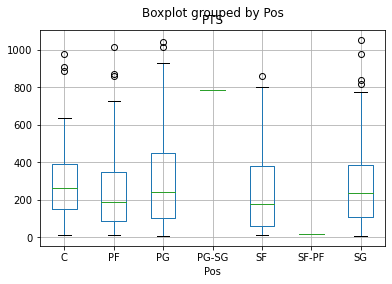

In [21]:
NBA_clean.dropna().boxplot(column='PTS',by='Pos')
plt.show()
#the mean of each group is roughly similar. However we can note that PG seems to be the highest scoring position 

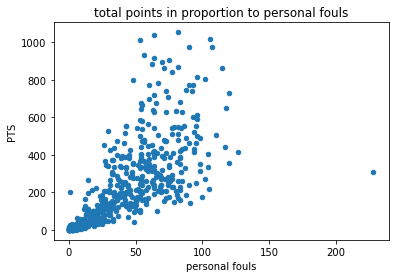

In [22]:
NBA_clean.plot(kind='scatter', x='PF', y='PTS')
plt.title('total points in proportion to personal fouls')
plt.xlabel('personal fouls')
plt.show()


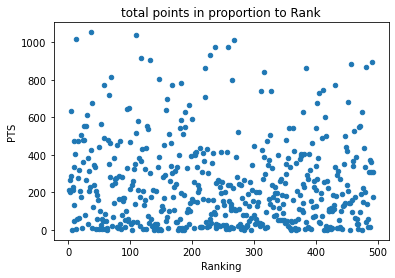

In [23]:
NBA_clean.plot(kind='scatter', x='Rk', y='PTS')
plt.title('total points in proportion to Rank')
plt.xlabel('Ranking')
plt.show()


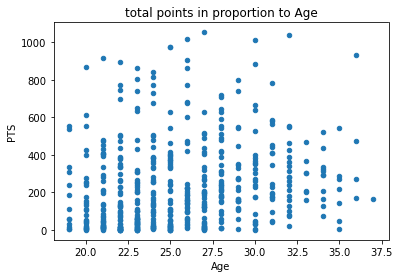

In [24]:
NBA_clean.plot(kind='scatter', x='Age', y='PTS')
plt.title('total points in proportion to Age')
plt.xlabel('Age')
plt.show()

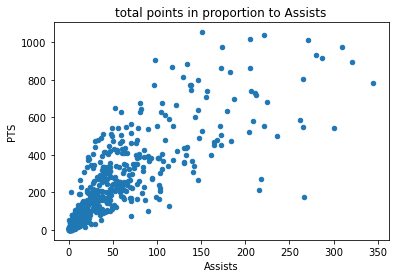

In [25]:
NBA_clean.plot(kind='scatter', x='AST', y='PTS')
plt.title('total points in proportion to Assists')
plt.xlabel('Assists')
plt.show()

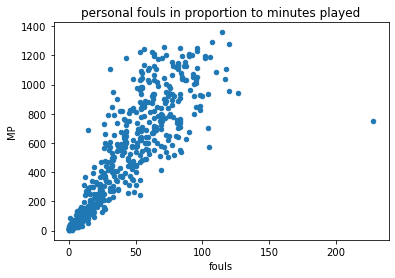

In [26]:
NBA_clean.plot(kind='scatter', x='PF', y='MP')
plt.title('personal fouls in proportion to minutes played')
plt.xlabel('fouls')
plt.show()

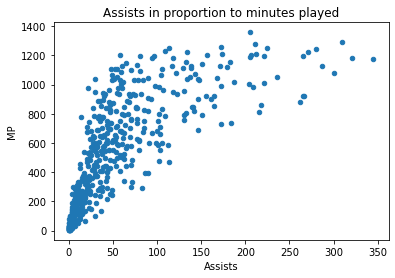

In [27]:
NBA_clean.plot(kind='scatter', x='AST', y='MP')
plt.title('Assists in proportion to minutes played')
plt.xlabel('Assists')
plt.show()